<a href="https://www.kaggle.com/code/mohamedbakhet/sentiment-analysis-in-arabic-tweets?scriptVersionId=100675212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<hr style="border: solid 3px BlueViolet;">

# <center><span style="font-family:Arial; font-style: italic; color:BlueViolet ">Sentiment Analysis  in Arabic tweets.</span></center>

<center>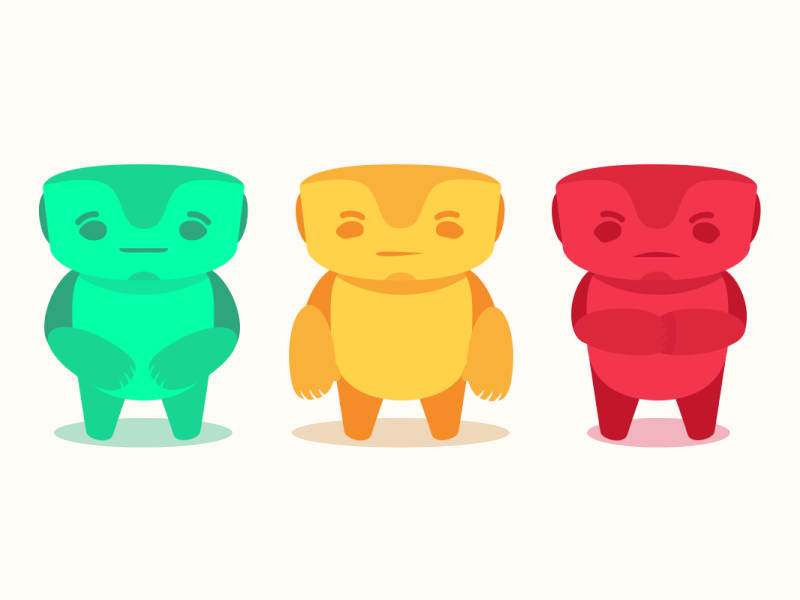<\center>

# <span style="font-family:Arial; font-style: italic; color:BlueViolet ">Table of Contents</span>
* [problem defination](#1)
* [Import Libraries](#2)
* [Load and prepare the dataset ](#3)
* [Preprocessing and Data Cleaning](#4)
* [Feature Engineering](#5)
  - [bag of words](#6)
  - [TF-IDF Model](#7)
  - [BERT tokenizer](#8)
* [Models Training and Evaluation ](#9)
  - [split the data](#10)
  - [prepare data loader](#11)
  - [Classical Machine Learning](#12)
  - [deep learning methods](#13)
* [create submited file](#14)





<a id="1"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:0px;
           background-color:BlueViolet;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
Problem Defination
    </b>
        </span>
        </center>
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:#626567;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px;
           line-height: 2">

<p style="padding: 24px;
              color:white;"> 
    <span style="font-size:21px;">
    <b>
         🔍 Arabic language has a number of challenges in NLP
    </b>
        </span>
 <br>

  <ul>

 <li>orthographic ambiguity<br> <p>Arabic is generally written using the Arabic Abjad script which uses optional   diacritical marks for short vowels and consonantal gemination. While
    the missing diacritics are not a major challenge to literate
    native adults, their absence is the main source of ambiguity
    in Arabic NLP.</p></li>  
      
   <li>Morphological Richness <br> <p>Arabic has a rich inflectional
    morphology system involving gender, number, person, aspect, mood, case, state and voice, in addition to the cliticization of a number of pronouns and particles (conjunctions, prepositions, definite article, etc.). This richness leads to MSA verbs with upwards of 5,400 forms.</p></li>  
    <li>Dialectal Variation<br> <p>Dialectal Variation While MSA is the official language
    of culture and education in the Arab World, it is no one’s
    native language. A number of different local dialects (such
    as Egyptian, Levantine, and Gulf) are the defacto daily languages of the Arab World – both off-line and on-line. Arabic dialects differ significantly in terms of their phonology,
    morphology and lexicon from each other and from MSA
    to the point that using MSA tools and resources for processing dialects is not sufficient. For example, Khalifa et
    al. (2016a) report that using a state-of-the-art tool for MSA
    morphological disambiguation on Gulf Arabic returns POS
    tag accuracy at about 72%, compared to the performance
    on MSA, which is 96%.</p></li> 
           <li>orthographic noise<br> <p>  Orthographic Inconsistency MSA and Arabic dialects,
    as encountered online, show a lot of spelling inconsistency.
    Zaghouani et al. (2014) report that 32% of words in MSA
    comments online have spelling errors. Habash et al. (2018)
    presented 27 encountered ways to write an Egyptian Arabic
    word meaning.</p></li>
  </ul>
    <span style="font-size:21px;">
    <b>
        📣 Goal
    </b>
        <p>Build sentiment analysis in arabic tweetes with egyptian dialect to dectect if tweet if positive or negative or natural </p>
        </span>
</div>

<a id="2"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:0px;
           background-color:BlueViolet;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
import liberaries
    </b>
        </span>
        </center>
</p>
</div>

## Download Liberaries

In [1]:
%%capture
!pip install pyarabic
!pip install emoji
!pip install pystemmer
!pip install optuna==2.3.0
!pip install farasapy
!pip install plotly==5.9.0
!pip install emot
!pip install transformers
!git clone https://github.com/aub-mind/arabert.git
!pip install arabic_reshaper
!pip install bidi.algorithm


## Import Liberaries

In [2]:
## download Liberaries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from emot.emo_unicode import UNICODE_EMOJI ,EMOJI_UNICODE, EMOTICONS_EMO
import re
import string
# libraries for plots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from arabert.preprocess import ArabertPreprocessor
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification,BertForSequenceClassification, AutoModelForMaskedLM,BertForPreTraining 
init_notebook_mode(connected=True)  
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn import preprocessing
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import validation_curve
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import time

## Enable GPU

In [3]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB
Tue Jul 12 23:14:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                

In [4]:

model_name="aubmindlab/bert-base-arabertv02-twitter"
model2_name="aubmindlab/aragpt2-mega"
model3_name='aubmindlab/bert-base-arabertv02'
model4_name='aubmindlab/bert-large-arabertv02-twitter'
model5_name='aubmindlab/bert-base-arabertv2'
model6_name='UBC-NLP/MARBERT'

arabert_prep = ArabertPreprocessor(model_name=model_name)

tokenizer = AutoTokenizer.from_pretrained(model_name)
#model = AutoModelForMaskedLM.from_pretrained("aubmindlab/bert-base-arabertv02-twitter")


deep_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

Downloading:   0%|          | 0.00/476 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/733k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/667 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/516M [00:00<?, ?B/s]

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02-twitter were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmi

<a id="3"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:0px;
           background-color:BlueViolet;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
Load and prepare the dataset 
    </b>
        </span>
        </center>
</p>
</div>

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-arabic-tweets/sample_submission.csv
/kaggle/input/nlp-arabic-tweets/train.csv
/kaggle/input/nlp-arabic-tweets/test.csv


In [6]:
df = pd.read_csv("/kaggle/input/nlp-arabic-tweets/train.csv")

display(df)

,tweet,class
0,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos
1,' #ميري_كرسمس كل سنة وانتم طيبين http://t.co/n...,pos
2,' و انتهى مشوار الخواجة ',neg
3,' مش عارف ابتدى مذاكره منين :/ ',neg
4,' @mskhafagi إختصروا الطريق بدلا من إختيار ال...,neg
...,...,...
2054,' @wasfa_N الجمال مبيحتاح اي مكياج لناعم وله خ...,neu
2055,' @TheMurexDor نتمني وجود الفنانة رنا سماحة اف...,neu
2056,' ولد الهدى فالكائنات ضياء .. وفم الزمان تبسم ...,pos
2057,' @mohamed71944156 @samarroshdy1 انت متناقض جد...,neg


## Check of classes size 

In [7]:
labels = df['class'].value_counts().keys()
values = df['class'].value_counts()
# Plot pie chart 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

<a id="4"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:0px;
           background-color:BlueViolet;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
Preprocessing and Data Cleaning 
    </b>
        </span>
        </center>
</p>
</div>


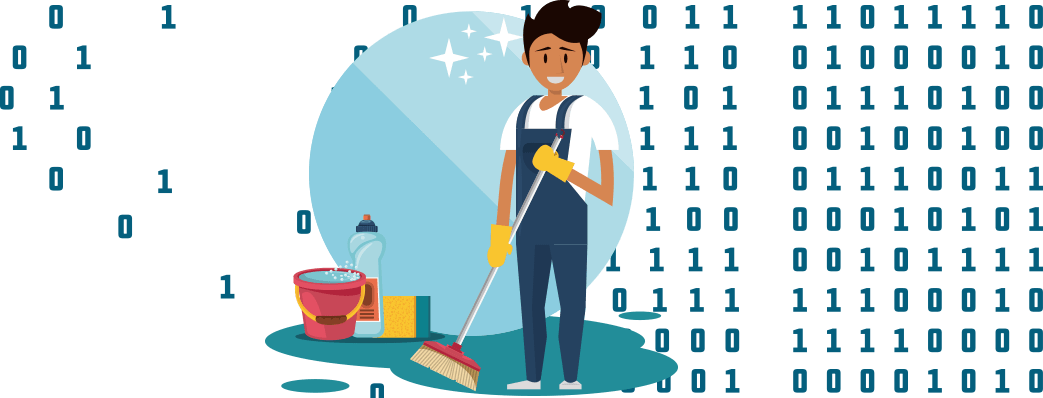


## remove emoji 😎

In [8]:
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text
# Example
print('before Remove emoji')
print(df.iloc[387,0])
print('After Remove emoji')
convert_emojis(df.iloc[387,0][1:-1])

before Remove emoji
' مش عايزه انا غيره معايا. ❤ '
After Remove emoji


' مش عايزه انا غيره معايا. red_heart '

## remove emojiicon  :-)

In [9]:
# Function for converting emoticons into word
def convert_emoticons(text):
    #text = re.escape(text)
    for emot in EMOTICONS_EMO:

        text = text.replace(emot, "_".join(EMOTICONS_EMO[emot].replace(",","").split()))
    return text
# Example
print('before Remove emoji')
print(df.iloc[109,0])
print('After Remove emoji')
convert_emoticons(df.iloc[109,0][1:-1])

before Remove emoji
' @Tota_Mee @r5oka @SamaRagab ههههههههههه كل دول عيالى اصﻻﻻﻻﻻﻻ :D '
After Remove emoji


' @Tota_Mee @r5oka @SamaRagab ههههههههههه كل دول عيالى اصﻻﻻﻻﻻﻻ Laughing_big_grin_or_laugh_with_glasses '

## data cleaning

In [10]:

def data_cleaning (text):
    # clean-up:
    # remove qutoions 
    text = text.strip()

    text= re.sub(r'http\S+', '', text)
    
    text= re.sub(r'ي+','ي', text)
    text = text.replace("آ", "ا")
    text = text.replace("إ", "ا")
    text = text.replace("أ", "ا")
    text = text.replace("ؤ", "و")
    text = text.replace("ئ", "ي")


    text= re.sub(r'[@|#]\S*', '',text)
    text= re.sub(r'"+', '', text)
    # Remove arabic signs
    #text= re.sub(r'([@A-Za-z0-9_ـــــــــــــ]+)|[^\w\s]|#|http\S+', '', text)
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 
   
    

    # Remove repeated letters like "الللللللللللللللله" to "الله"
    text= text[0:2] + ''.join([text[i] for i in range(2, len(text)) if text[i]!=text[i-1] or text[i]!=text[i-2]])
    text= re.sub(r'D',':D', text)
    text= re.sub(r'هه+', 'face_with_tears_of_joy', text)
    text= convert_emojis(text)
    text= convert_emoticons(text)

     # Removing punctuations in string
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text=re.sub(r'(?:^| )\w(?:$| )', ' ', text)
    text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
    text = re.sub(" \d+", " ", text)
    text = re.sub("(\s\d+)","",text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub("(\s\d+)","",text) 
    # Returns: hi what is the weather like
    

    return text


In [11]:
df['preprocessing'] =df.iloc[:,0].apply(lambda x:data_cleaning(x))
df['preprocessing'] =df['preprocessing'] .apply(lambda x:arabert_prep.preprocess(x))

<a id="5"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:0px;
           background-color:BlueViolet;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
Feature Engineering
    </b>
        </span>
        </center>
</p>
</div>

<a id="6"></a>
## Bog of word

In [12]:
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)
X_BOG = cv.fit_transform(df['preprocessing'].values)

<a id="7"></a>
## TF-IDF

In [13]:
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
X_Tf = tv.fit_transform(df['preprocessing'])

<a id="8"></a>
## BERT tokenizer

In [14]:
df["bert_tokens"] = df.preprocessing.apply(lambda x: tokenizer(x).tokens())   
df["encoded"] = df.tweet.apply(lambda x: tokenizer.encode_plus(x,return_tensors='pt')['input_ids'])

In [15]:
display(df)

,tweet,class,preprocessing,bert_tokens,encoded
0,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos,ان الذين يعيشون على الارض ليسوا ملايكة بل بشر ...,"[[CLS], ان, الذين, يعيشون, على, الارض, ليسوا, ...","[[tensor(2), tensor(13), tensor(10), tensor(10..."
1,' #ميري_كرسمس كل سنة وانتم طيبين http://t.co/n...,pos,كل سنة وانتم طيبين,"[[CLS], كل, سنة, وانتم, طيب, ##ين, [SEP]]","[[tensor(2), tensor(13), tensor(10), tensor(40..."
2,' و انتهى مشوار الخواجة ',neg,انتهى مشوار الخواجة,"[[CLS], انتهى, مشوار, الخواجة, [SEP]]","[[tensor(2), tensor(13), tensor(139), tensor(6..."
3,' مش عارف ابتدى مذاكره منين :/ ',neg,مش عارف ابتدى مذاكره منين Skepticalannoyedunde...,"[[CLS], مش, عارف, ابتد, ##ى, مذاكره, مني, ##ن,...","[[tensor(2), tensor(13), tensor(533), tensor(1..."
4,' @mskhafagi إختصروا الطريق بدلا من إختيار ال...,neg,اختصروا الطريق بدلا من اختيار المنصف ثم الانقل...,"[[CLS], اخت, ##صروا, الطريق, بدلا, من, اختيار,...","[[tensor(2), tensor(13), tensor(37), tensor(82..."
...,...,...,...,...,...
2054,' @wasfa_N الجمال مبيحتاح اي مكياج لناعم وله خ...,neu,الجمال مبيحتاح اي مكياج لناعم وله خشن جمل الطا...,"[[CLS], الجمال, مبي, ##حت, ##اح, اي, مكي, ##اج...","[[tensor(2), tensor(13), tensor(37), tensor(92..."
2055,' @TheMurexDor نتمني وجود الفنانة رنا سماحة اف...,neu,نتمني وجود الفنانة رنا سماحة افضل فنانة صاعدة ...,"[[CLS], نتم, ##ني, وجود, الفنانة, رنا, سماحة, ...","[[tensor(2), tensor(13), tensor(37), tensor(16..."
2056,' ولد الهدى فالكائنات ضياء .. وفم الزمان تبسم ...,pos,ولد الهدى فالكاينات ضياء وفم الزمان تبسم وسناء...,"[[CLS], ولد, الهدى, فالك, ##اين, ##ات, ضياء, و...","[[tensor(2), tensor(13), tensor(4254), tensor(..."
2057,' @mohamed71944156 @samarroshdy1 انت متناقض جد...,neg,انت متناقض جدا يا صلاح,"[[CLS], انت, متناقض, جدا, يا, صلاح, [SEP]]","[[tensor(2), tensor(13), tensor(37), tensor(82..."


<a id="9"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:0px;
           background-color:BlueViolet;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
Models Training and Evaluation
    </b>
        </span>
        </center>
</p>
</div>

<a id="10"></a> <br>
## split the data 

In [16]:
bert_tokens = df["bert_tokens"]
labels = df["class"]

# Apply label encoding over the labels
le = preprocessing.LabelEncoder()
Encodedlabels =le.fit_transform(labels)

In [17]:
train_BOG, validation_BOG, train_BOG_labels, validation_BOG_labels = train_test_split(X_BOG, Encodedlabels, 
                                                            random_state=42, test_size=0.1,stratify=Encodedlabels)

In [18]:
train_TF, validation_TF, train_TF_labels, validation_TF_labels = train_test_split(X_Tf, Encodedlabels, 
                                                            random_state=42, test_size=0.1,stratify=Encodedlabels)

<a id="11"></a> <br>
## prepare data loader

In [19]:
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway. 
# In the original paper, the authors used a length of 512.
MAX_LEN = 256
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in bert_tokens]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [20]:
#### # Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, Encodedlabels, 
                                                            random_state=42, test_size=0.1,stratify=Encodedlabels)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=42, test_size=0.1)
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_dataloader = DataLoader(validation_data, batch_size=batch_size)

<a id="12"></a>
## Classical Machine Learning

In [21]:
models=[SVC(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(), MultinomialNB()]

### apply classical ML with Bag of Word

train accuracy: 92.01295196977874
validation accuracy: 46.116504854368934


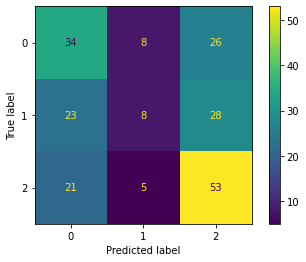

***************************************************************************************
train accuracy: 99.02860226659472
validation accuracy: 49.51456310679612


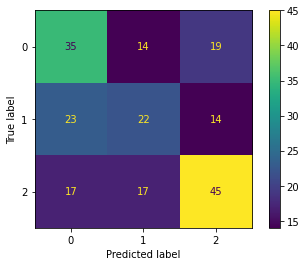

***************************************************************************************
train accuracy: 99.83810037776578
validation accuracy: 48.54368932038835


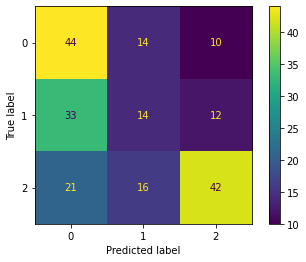

***************************************************************************************
train accuracy: 99.83810037776578
validation accuracy: 54.36893203883495


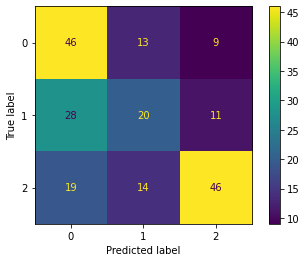

***************************************************************************************
train accuracy: 70.3723691311387
validation accuracy: 46.116504854368934


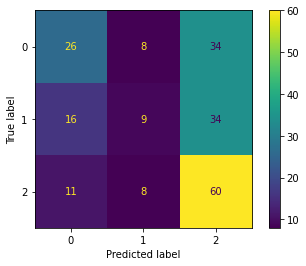

***************************************************************************************
train accuracy: 94.76524554776039
validation accuracy: 55.33980582524271


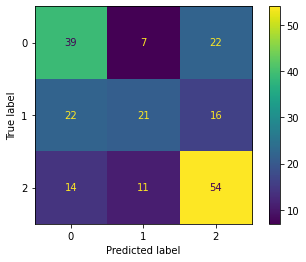

***************************************************************************************


In [22]:
for model in models:
    start = time.time()
    model.fit(train_BOG, train_BOG_labels)
    stop = time.time()
    train_time=(stop-start)
    train_score=model.score(train_BOG, train_BOG_labels)*100
    test_score=model.score( validation_BOG , validation_BOG_labels)*100
    print("===============================================")
    print('train accuracy:',train_score)
    print('validation accuracy:',test_score)
    print("===============================================")
    ConfusionMatrixDisplay.from_estimator(model,validation_BOG , validation_BOG_labels)  
    plt.show()
    print("***************************************************************************************")

    
        

### apply classical ML with TF-IDF

train accuracy: 99.62223421478683
validation accuracy: 50.0


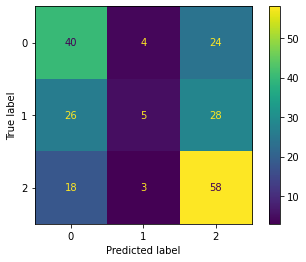

***************************************************************************************
train accuracy: 96.0604425256341
validation accuracy: 51.94174757281553


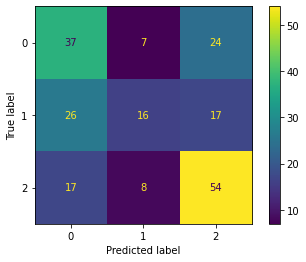

***************************************************************************************
train accuracy: 99.83810037776578
validation accuracy: 49.51456310679612


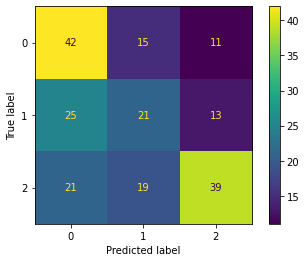

***************************************************************************************
train accuracy: 99.83810037776578
validation accuracy: 49.029126213592235


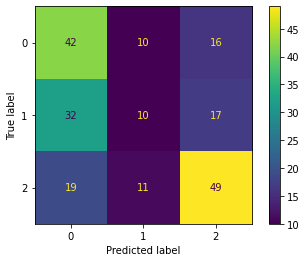

***************************************************************************************
train accuracy: 75.12142471667566
validation accuracy: 48.54368932038835


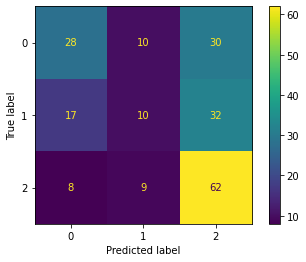

***************************************************************************************
train accuracy: 94.81921208850513
validation accuracy: 50.0


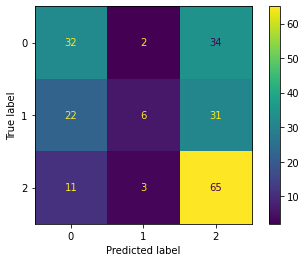

***************************************************************************************


In [23]:
for model in models:
    start = time.time()
    model.fit(train_TF, train_TF_labels)
    stop = time.time()
    train_time=(stop-start)
    train_score=model.score(train_TF, train_TF_labels)*100
    test_score=model.score( validation_TF , validation_TF_labels)*100
    print("===============================================")
    print('train accuracy:',train_score)
    print('validation accuracy:',test_score)
    print("===============================================")
    ConfusionMatrixDisplay.from_estimator(model,validation_TF , validation_TF_labels)  
    plt.show()
    print("***************************************************************************************")

    
        

<a id="13"></a>

## deep learning methods 

In [24]:
for batch in train_dataloader:
  print(batch)
  break

[tensor([[    2,   306,  8127,  ...,     0,     0,     0],
        [    2, 29084,   229,  ...,     0,     0,     0],
        [    2, 29920,  7956,  ...,     0,     0,     0],
        ...,
        [    2,   394,   583,  ...,     0,     0,     0],
        [    2,  2544, 27069,  ...,     0,     0,     0],
        [    2,  9535, 28739,  ...,     0,     0,     0]]), tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.]]), tensor([2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2,
        0, 1, 2, 0, 2, 0, 2, 2])]


In [25]:
import torch.optim as optim

param_optimizer = list(deep_model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],'weight_decay_rate': 0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],'weight_decay_rate': 0.0}]
# This variable contains all of the hyperparemeter information our training loop needs
#optimizer = BertAdam(optimizer_grouped_parameters,lr=2e-5,warmup=.1)
optimizer = optim.AdamW(optimizer_grouped_parameters,lr=2e-5)

In [26]:
from tqdm import tqdm, trange
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
t = []

# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs 
epochs = 6

# Transfer the model to GPU
deep_model.to("cuda")

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  deep_model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    b_input_ids, b_input_mask, b_labels = batch

    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()

    # Forward pass
    loss = deep_model(b_input_ids.to("cuda"), token_type_ids=None, attention_mask=b_input_mask.to("cuda"), labels=b_labels.to("cuda"))["loss"]
    train_loss_set.append(loss.item())

    # Backward pass
    loss.backward()
    
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  deep_model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    # batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = deep_model(b_input_ids.to("cuda"), token_type_ids=None, attention_mask=b_input_mask.to("cuda"))
    
    # Move logits and labels to CPU
    logits = logits["logits"].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
  

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Train loss: 1.0062059718987038


Epoch:  17%|█▋        | 1/6 [00:44<03:44, 44.89s/it]

Validation Accuracy: 0.6122448979591837
Train loss: 0.7529579015641377


Epoch:  33%|███▎      | 2/6 [01:28<02:57, 44.40s/it]

Validation Accuracy: 0.7219387755102041
Train loss: 0.5402519101726597


Epoch:  50%|█████     | 3/6 [02:13<02:12, 44.25s/it]

Validation Accuracy: 0.7353316326530612
Train loss: 0.38242274702622975


Epoch:  67%|██████▋   | 4/6 [02:57<01:28, 44.17s/it]

Validation Accuracy: 0.7219387755102041
Train loss: 0.23326985756384916


Epoch:  83%|████████▎ | 5/6 [03:41<00:44, 44.14s/it]

Validation Accuracy: 0.7487244897959184
Train loss: 0.17647472479990844


Epoch: 100%|██████████| 6/6 [04:25<00:00, 44.20s/it]

Validation Accuracy: 0.7340561224489796


<a id="14"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:0px;
           background-color:BlueViolet;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
create submited file
    </b>
        </span>
        </center>
</p>
</div>

In [27]:

#============= Read CSV and apply data preperation =============#
df_submit = pd.read_csv("../input/nlp-arabic-tweets/test.csv")

# clean-up: remove #tags, http links and special symbols
df_submit['preprocessing'] =df_submit.iloc[:,1].apply(lambda x:data_cleaning(x))
df_submit['preprocessing'] =df_submit['preprocessing'] .apply(lambda x:arabert_prep.preprocess(x))

df_submit["bert_tokens"] = df_submit.preprocessing.apply(lambda x: tokenizer(x).tokens())   
df_submit["encoded"] = df_submit.tweet.apply(lambda x: tokenizer.encode_plus(x,return_tensors='pt')['input_ids'])

In [28]:
df_submit

,Id,tweet,preprocessing,bert_tokens,encoded
0,1,' فينو الاهبل ابن الاهبل ',فينو الاهبل ابن الاهبل,"[[CLS], فين, ##و, الاهبل, ابن, الاهبل, [SEP]]","[[tensor(2), tensor(13), tensor(7995), tensor(..."
1,2,' على المصرييييين وجمالهم ربنا يحميهم #MinaAtt...,على المصرين وجمالهم ربنا يحميهم,"[[CLS], على, المصري, ##ن, وجمال, ##هم, ربنا, ي...","[[tensor(2), tensor(13), tensor(323), tensor(1..."
2,3,' @Kholoudkewan دول كتير اوى ودمهم خفيف العما...,دول كتير اوى ودمهم خفيف العمارة اللي انا فيها ...,"[[CLS], دول, كتير, او, ##ى, ودم, ##هم, خفيف, ا...","[[tensor(2), tensor(13), tensor(37), tensor(48..."
3,4,' انا بعد كده خلى اللى يوعنى بحاجه همضى على...,انا بعد كده خلى اللى يوعنى بحاجه همضى على وصل ...,"[[CLS], انا, بعد, كده, خل, ##ى, اللى, يو, ##عن...","[[tensor(2), tensor(13), tensor(6728), tensor(..."
4,5,' انا هنتحر ',انا هنتحر,"[[CLS], انا, هنت, ##حر, [SEP]]","[[tensor(2), tensor(13), tensor(6728), tensor(..."
...,...,...,...,...,...
682,683,' كاستيلو المنتزه بقا خره نيك ',كاستيلو المنتزه بقا خره نيك,"[[CLS], كاست, ##يلو, المنتزه, بقا, خر, ##ه, ني...","[[tensor(2), tensor(13), tensor(15700), tensor..."
683,684,' @badorh666 اهم شئ ...الطاعة ..... ',اهم شي الطاعة,"[[CLS], اهم, شي, الطاعة, [SEP]]","[[tensor(2), tensor(13), tensor(37), tensor(71..."
684,685,' ايووووووووه بقى يا مينوووو وحشتنااااا #مينا_...,ايووه بقى يا مينوو وحشتناا,"[[CLS], اي, ##و, ##وه, بقى, يا, مين, ##و, ##و,...","[[tensor(2), tensor(13), tensor(897), tensor(1..."
685,686,' العشرى جون #الزمالك الاول جول واحمد الله لان...,العشرى جون الاول جول واحمد الله لانها لم يحتسب...,"[[CLS], العشرى, جون, الاول, جول, واحمد, الله, ...","[[tensor(2), tensor(13), tensor(40127), tensor..."


In [29]:
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway. 
# In the original paper, the authors used a length of 512.
MAX_LEN = 256
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids_submit = [tokenizer.convert_tokens_to_ids(x) for x in df_submit["bert_tokens"] ]
# Pad our input tokens
input_ids_submit = pad_sequences(input_ids_submit, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks_submit = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids_submit:
  seq_mask = [float(i>0) for i in seq]
  attention_masks_submit.append(seq_mask)

In [30]:
# Convert all of our data into torch tensors, the required datatype for our model
inputs_submit = torch.tensor(input_ids_submit)
masks_submit = torch.tensor(attention_masks_submit)

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory
batch_size =32
submit_data = TensorDataset(inputs_submit, masks_submit)

# do not use shuffle, we need the preds to be in same order
submit_dataloader = DataLoader(submit_data, batch_size=batch_size)#, shuffle=True)

In [31]:
# Transfer model to GPU
deep_model.to("cuda")

outputs = []
for input, masks in submit_dataloader:
  torch.cuda.empty_cache() # empty the gpu memory

  # Transfer the batch to gpu
  input = input.to('cuda')
  masks = masks.to('cuda')

  # Run inference on the batch
  output = deep_model(input, attention_mask=masks)["logits"]

  # Transfer the output to CPU again and convert to numpy
  output = output.cpu().detach().numpy()

  # Store the output in a list
  outputs.append(output)

# Concatenate all the lists within the list into one list
outputs = [x for y in outputs for x in y]

# Inverse transform the label encoding
pred_flat = np.argmax(outputs, axis=1).flatten()
output_labels = le.inverse_transform(pred_flat)

In [32]:
submission = pd.DataFrame({"Id":np.arange(1, len(output_labels)+1), "class":output_labels})
# save (submission)
submission.to_csv("submission.csv", index=False)

In [33]:
submission

,Id,class
0,1,neg
1,2,pos
2,3,pos
3,4,neu
4,5,neg
...,...,...
682,683,neg
683,684,neu
684,685,pos
685,686,neg


<a id="14"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:0px;
           background-color:BlueViolet;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
if you found this notebook useful please upvote
    </b>
        <br> <br>
        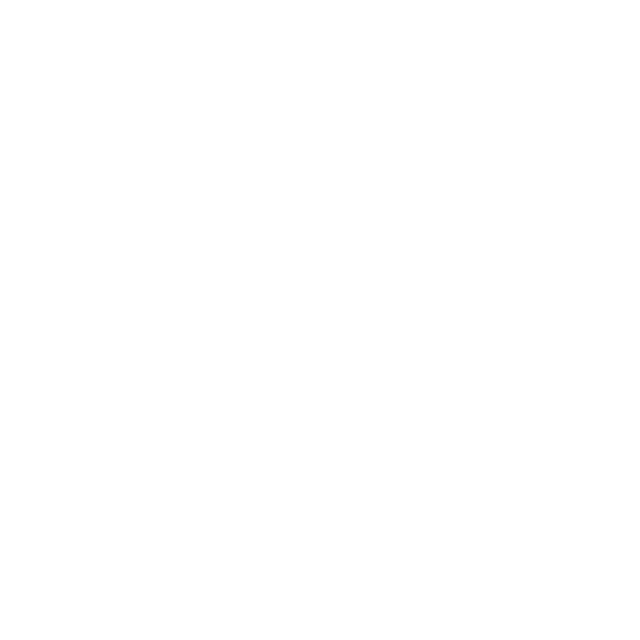
        </span>
        </center>
</p>
</div>


<center>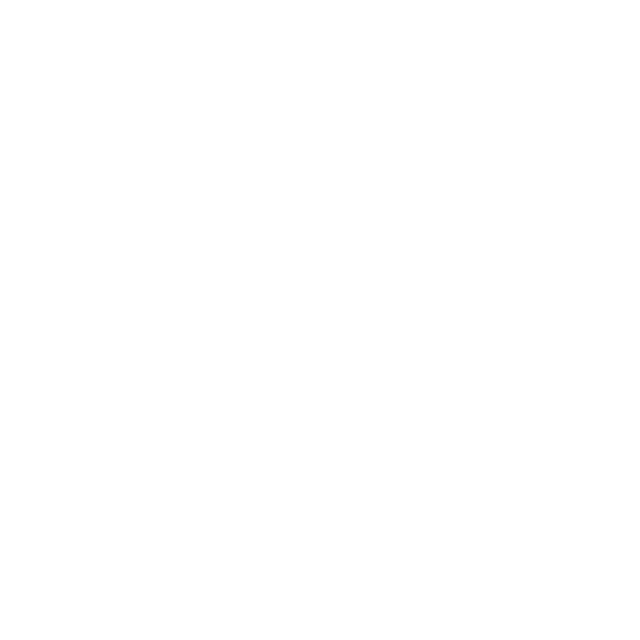</center>!